In [34]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../')
import canny.utils.utils as utils

In [25]:
import os
from pathlib import Path

p = os.path.dirname(os.getcwd())

print(p)

d:\AGH\AIDA_3\image\AMiIU\1_edge_detection_different_methods


In [ ]:
def visualize(imgs, format=None, gray=False):
    plt.figure(figsize=(20, 40))
    for i, img in enumerate(imgs):
        if img.shape[0] == 3:
            img = img.transpose(1,2,0)
        plt_idx = i+1
        plt.subplot(2, 2, plt_idx)
        plt.imshow(img, format)
    plt.show()


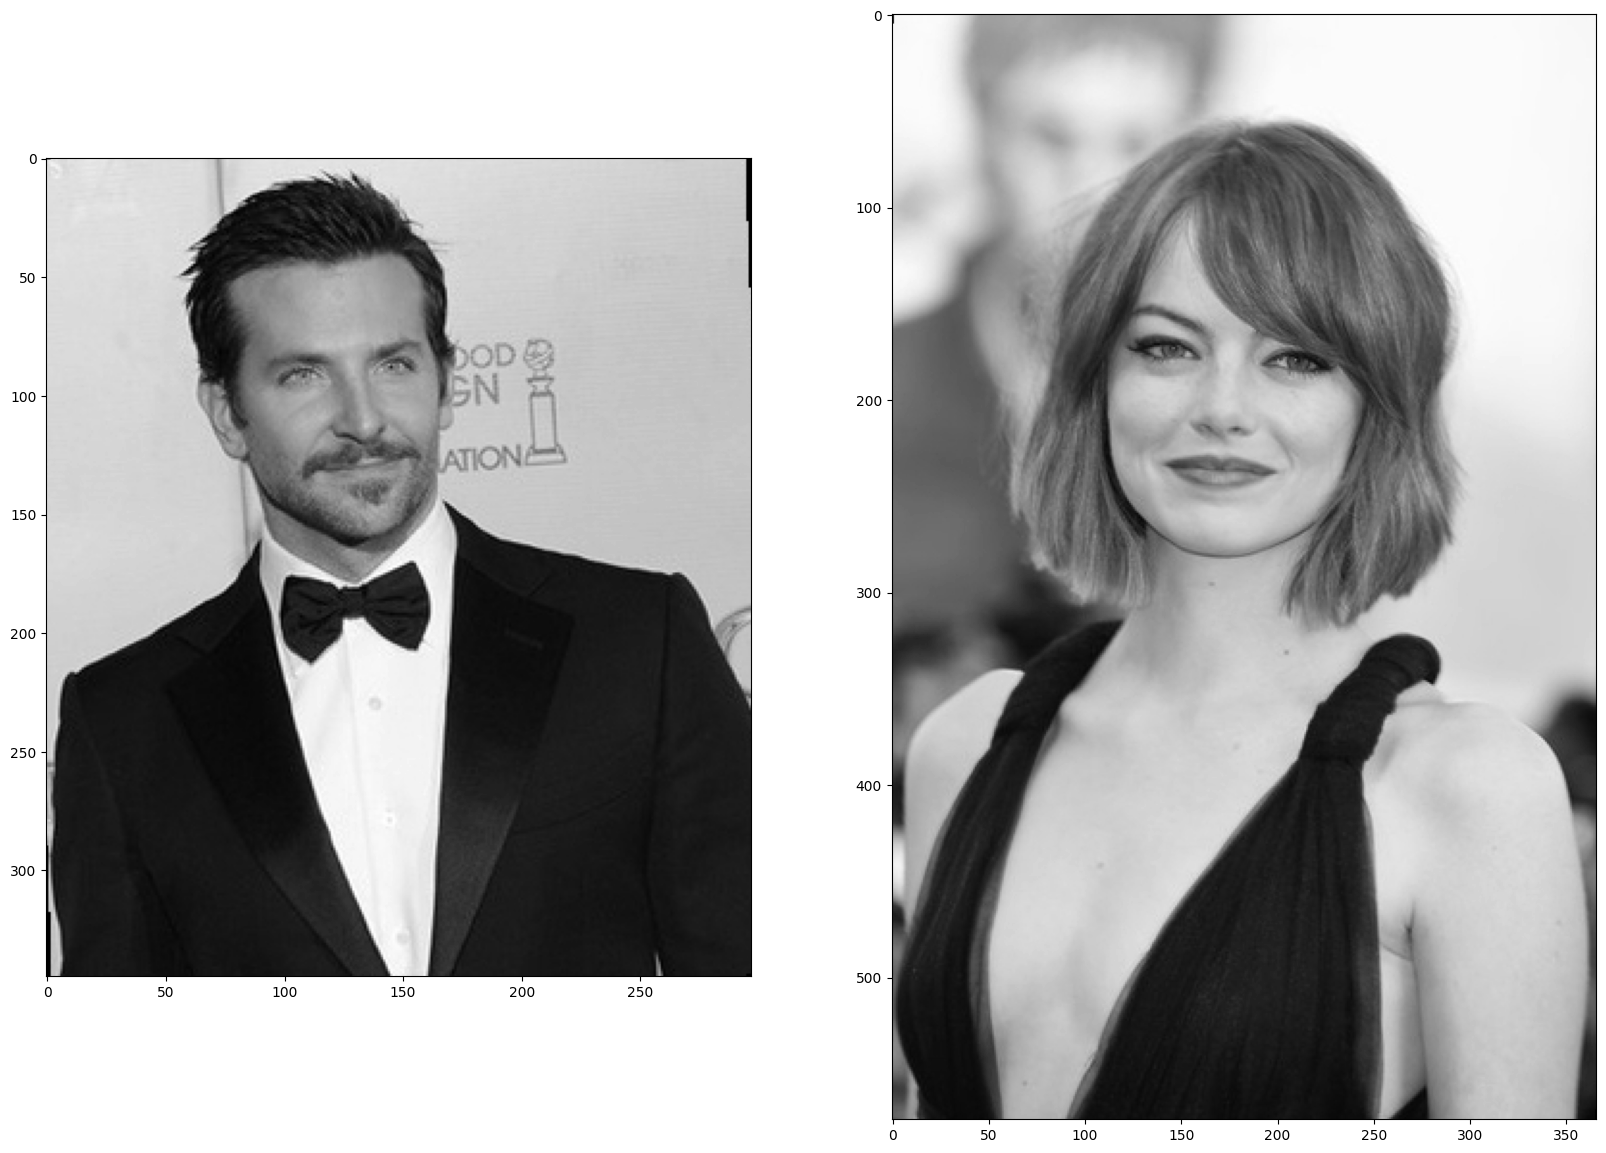

In [30]:
image = utils.load_data('../canny/faces_imgs')
utils.visualize(image, format="gray")

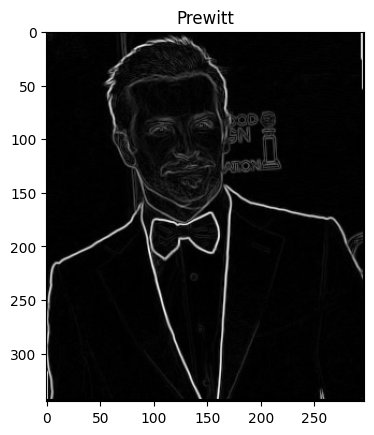

In [36]:
gray_img = np.array(image[0])

# Prewitt Operator
h, w = gray_img.shape
# define filters
horizontal = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # s2
vertical = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])  # s1

# define images with 0s
newgradientImage = np.zeros((h, w))

# offset by 1
for i in range(1, h - 1):
    for j in range(1, w - 1):
        horizontalGrad = (horizontal[0, 0] * gray_img[i - 1, j - 1]) + \
                         (horizontal[0, 1] * gray_img[i - 1, j]) + \
                         (horizontal[0, 2] * gray_img[i - 1, j + 1]) + \
                         (horizontal[1, 0] * gray_img[i, j - 1]) + \
                         (horizontal[1, 1] * gray_img[i, j]) + \
                         (horizontal[1, 2] * gray_img[i, j + 1]) + \
                         (horizontal[2, 0] * gray_img[i + 1, j - 1]) + \
                         (horizontal[2, 1] * gray_img[i + 1, j]) + \
                         (horizontal[2, 2] * gray_img[i + 1, j + 1])

        verticalGrad = (vertical[0, 0] * gray_img[i - 1, j - 1]) + \
                       (vertical[0, 1] * gray_img[i - 1, j]) + \
                       (vertical[0, 2] * gray_img[i - 1, j + 1]) + \
                       (vertical[1, 0] * gray_img[i, j - 1]) + \
                       (vertical[1, 1] * gray_img[i, j]) + \
                       (vertical[1, 2] * gray_img[i, j + 1]) + \
                       (vertical[2, 0] * gray_img[i + 1, j - 1]) + \
                       (vertical[2, 1] * gray_img[i + 1, j]) + \
                       (vertical[2, 2] * gray_img[i + 1, j + 1])

        # Edge Magnitude
        mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
        newgradientImage[i - 1, j - 1] = mag


plt.figure()
plt.title('Prewitt')
plt.imshow(newgradientImage, cmap='gray')
plt.show()